<a href="https://colab.research.google.com/github/seokjinwoo/randomforest/blob/main/mglearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
iris_dataset = load_iris()

In [ ]:
print(iris_dataset.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [ ]:
print(iris_dataset['DESCR'][:193] + "\n...")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre
...


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state = 0
)

In [ ]:
!pip install mglearn

     |████████████████████████████████| 542kB 5.5MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=5e1f2b7855b98f8880656fcaa99771dc44b52e534eb3374f26e102dcf617e1dd
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


In [ ]:
import pandas as pd
import mglearn


In [ ]:
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1bc460fb50>,
      dtype=object)

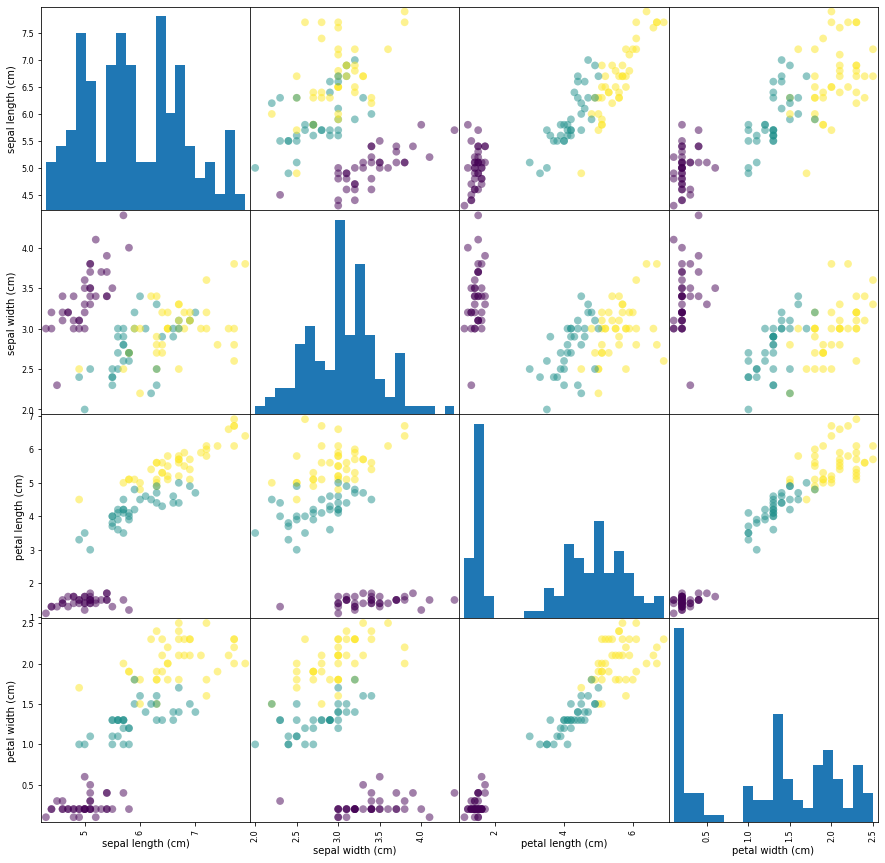

In [ ]:
pd.plotting.scatter_matrix(iris_dataframe, c = y_train, figsize=(15,15), marker='o', hist_kwds={'bins':20}, s= 60, alpha = 0.5)

In [ ]:
# generate dataset
X, y = mglearn.datasets.make_forge()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


Text(0, 0.5, 'Second feature')

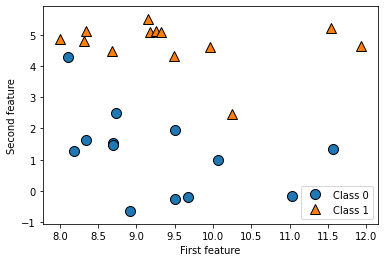

In [ ]:
# plot dataset
import matplotlib.pyplot as plt

mglearn.discrete_scatter(X[:,0], X[:,1],y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")

In [ ]:
X, y = mglearn.datasets.make_wave(n_samples=40)

Text(0, 0.5, 'Target')

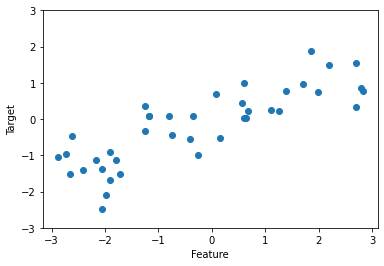

In [ ]:
plt.plot(X,y,'o')
plt.ylim(-3,3)
plt.xlabel("Feature")
plt.ylabel("Target")

In [ ]:
# load data example

from sklearn.datasets import load_breast_cancer
import numpy as np


In [ ]:
cancer = load_breast_cancer()

In [ ]:
print("cancer.keys(): \n", cancer.keys())

cancer.keys(): 
 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [ ]:
cancer.data.shape

(569, 30)

In [ ]:
print("sample counts per class:\n",
      {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

sample counts per class:
 {'malignant': 212, 'benign': 357}


In [ ]:
# knn example
!pip install mglearn
import mglearn


     |████████████████████████████████| 542kB 5.6MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=a7dbf71afeb0008590bd28b1077f7b8c9864d5392215d52270bf0a9938f4292b
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


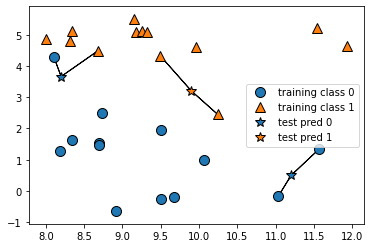

In [ ]:
mglearn.plots.plot_knn_classification(n_neighbors=2)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X, y = mglearn.datasets.make_forge()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
clf = KNeighborsClassifier(n_neighbors=3)

In [ ]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
print("Test set predictoin:", clf.predict(X_test))

Test set predictoin: [1 0 1 0 1 0 0]


In [ ]:
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set accuracy: 0.86


In [ ]:
import matplotlib.pyplot as plt


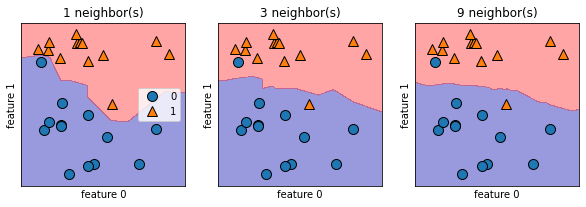

In [ ]:
fig, axes = plt.subplots(1,3, figsize = (10,3))

for n, ax in zip([1,3,9], axes):
  clf = KNeighborsClassifier(n_neighbors= n).fit(X,y)
  mglearn.plots.plot_2d_separator(clf, X, fill = True, eps=0.5, ax = ax, alpha=0.4)
  mglearn.discrete_scatter(X[:,0], X[:,1], y , ax = ax)
  ax.set_title("{} neighbor(s)".format(n))
  ax.set_xlabel("feature 0")
  ax.set_ylabel("feature 1")
  axes[0].legend(loc=5)

In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
cancer = load_breast_cancer()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, 
    stratify = cancer.target, 
    random_state=66
    )

In [ ]:
training_accuracy = []

In [ ]:
test_accuracy = []

In [ ]:
n_settings = range(1,11)

In [ ]:
for n in n_settings:
  # build the model
  clf = KNeighborsClassifier(n_neighbors=n)
  clf.fit(X_train, y_train)
  training_accuracy.append(clf.score(X_train, y_train))
  test_accuracy.append(clf.score(X_test, y_test))

In [ ]:
test_accuracy

[0.9020979020979021,
 0.8881118881118881,
 0.9230769230769231,
 0.9230769230769231,
 0.9230769230769231,
 0.9370629370629371,
 0.9300699300699301,
 0.9300699300699301,
 0.916083916083916,
 0.916083916083916]

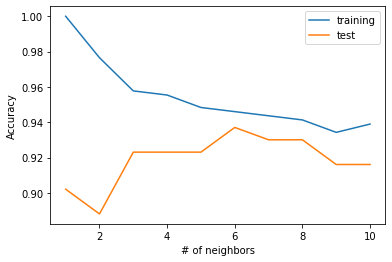

In [ ]:
import matplotlib.pyplot as plt

plt.plot(n_settings, training_accuracy, label = "training")
plt.plot(n_settings, test_accuracy, label = "test")
plt.ylabel("Accuracy")
plt.xlabel("# of neighbors")
plt.legend()

In [ ]:
!pip install mglearn


NameError: ignored

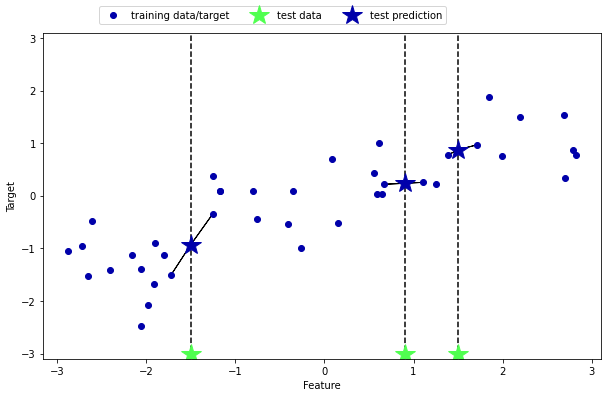

In [ ]:
mglearn.plots.plot_knn_regression(n_neighbors=2)

w[0]: 0.393906  b: -0.031804


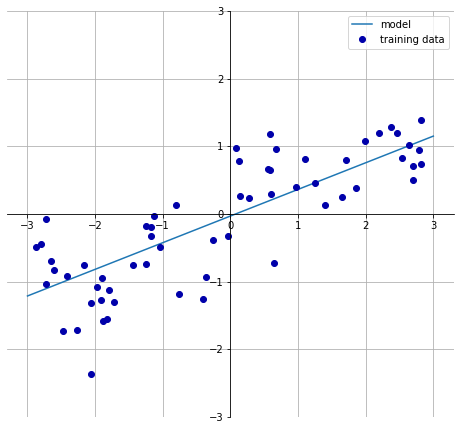

In [ ]:
#
mglearn.plots.plot_linear_regression_wave()

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
X, y = mglearn.datasets.make_wave(n_samples=60)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [ ]:
lr = LinearRegression().fit(X_train, y_train)

In [ ]:
print("lr.coef_:", lr.coef_)
print("lf.intercept:", lr.intercept_)

lr.coef_: [0.39390555]
lf.intercept: -0.031804343026759746


In [ ]:
format(lr.score(X_test,y_test))

'0.65933685968637'

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
X, y = mglearn.datasets.load_extended_boston()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [ ]:
ridge = Ridge().fit(X_train, y_train)

In [ ]:
ridge.score(X_train, y_train)


0.8857966585170941

In [ ]:
ridge.score(X_test, y_test)

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
lasso = Lasso().fit(X_train, y_train)

In [ ]:
lasso.score(X_train, y_train)

0.29323768991114607

In [ ]:
lasso.score(X_test, y_test)

0.20937503255272294

In [ ]:
np.sum(lasso.coef_ != 0)

4

In [ ]:
# classification
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

In [ ]:
X, y = mglearn.datasets.make_forge()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


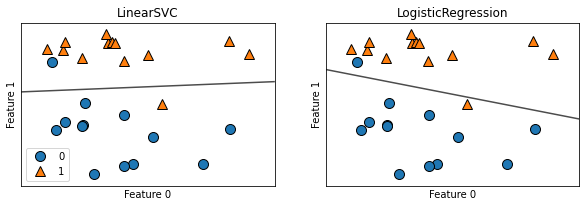

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (10,3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
  clf = model.fit(X,y)
  mglearn.plots.plot_2d_separator(clf, X, fill =False, eps = 0.5, ax = ax, alpha = 0.7)
  mglearn.discrete_scatter(X[:,0], X[:,1],y, ax = ax)
  ax.set_title(clf.__class__.__name__)
  ax.set_xlabel("Feature 0")
  ax.set_ylabel("Feature 1")
  axes[0].legend()


In [ ]:
# logistic regression
from sklearn.datasets import load_breast_cancer

In [ ]:
cancer = load_breast_cancer()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state = 42
)

In [ ]:
logreg = LogisticRegression().fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
logreg.score(X_train, y_train)

0.9530516431924883

In [ ]:
logreg.score(X_test, y_test)

0.958041958041958

In [ ]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
logreg100.score(X_train, y_train)

0.9553990610328639

In [ ]:
logreg100.score(X_test, y_test)

0.9440559440559441

In [2]:
!pip install mglearn


In [5]:
from sklearn.datasets import make_blobs
import mglearn

In [6]:
X, y = make_blobs(random_state=2)

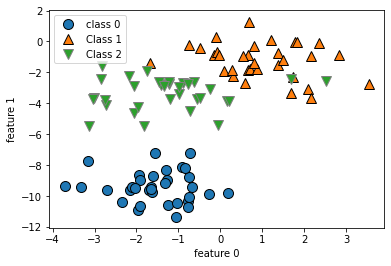

In [9]:
import matplotlib.pyplot as plt

mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel("feature 0")
plt.ylabel("feature 1")
plt.legend(["class 0", "Class 1", "Class 2"])

In [10]:
import numpy as np


In [15]:
X = np.array([[0,1,0,1],
              [1,0,1,1],
              [0,0,0,1],
              [1,0,1,0]
              ])
y = np.array([0,1,0,1])

In [14]:
counts = {}

In [16]:
for label in np.unique(y):
  counts[label] = X[y == label].sum(axis  = 0)

print("Feature counts:\n", counts)

Feature counts:
 {0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


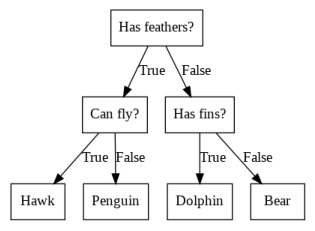

In [18]:
# decision tree
mglearn.plots.plot_animal_tree()

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [25]:
cancer = load_breast_cancer()

In [28]:
X_train, X_test, y_train, y_test = train_test_split( 
    cancer.data, cancer.target , stratify = cancer.target, random_state = 42
)

In [29]:
tree = DecisionTreeClassifier(random_state=0)

In [30]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [31]:
tree.score(X_train, y_train)

1.0

In [33]:
tree.score(X_test, y_test)

0.9370629370629371

In [34]:
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on test set: 0.937


In [35]:
from sklearn.tree import export_graphviz

In [36]:
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benigh"], feature_names=cancer.feature_names, impurity=False, filled=True)

In [37]:
import graphviz

In [38]:
with open("tree.dot") as f:
  dot_graph = f.read()

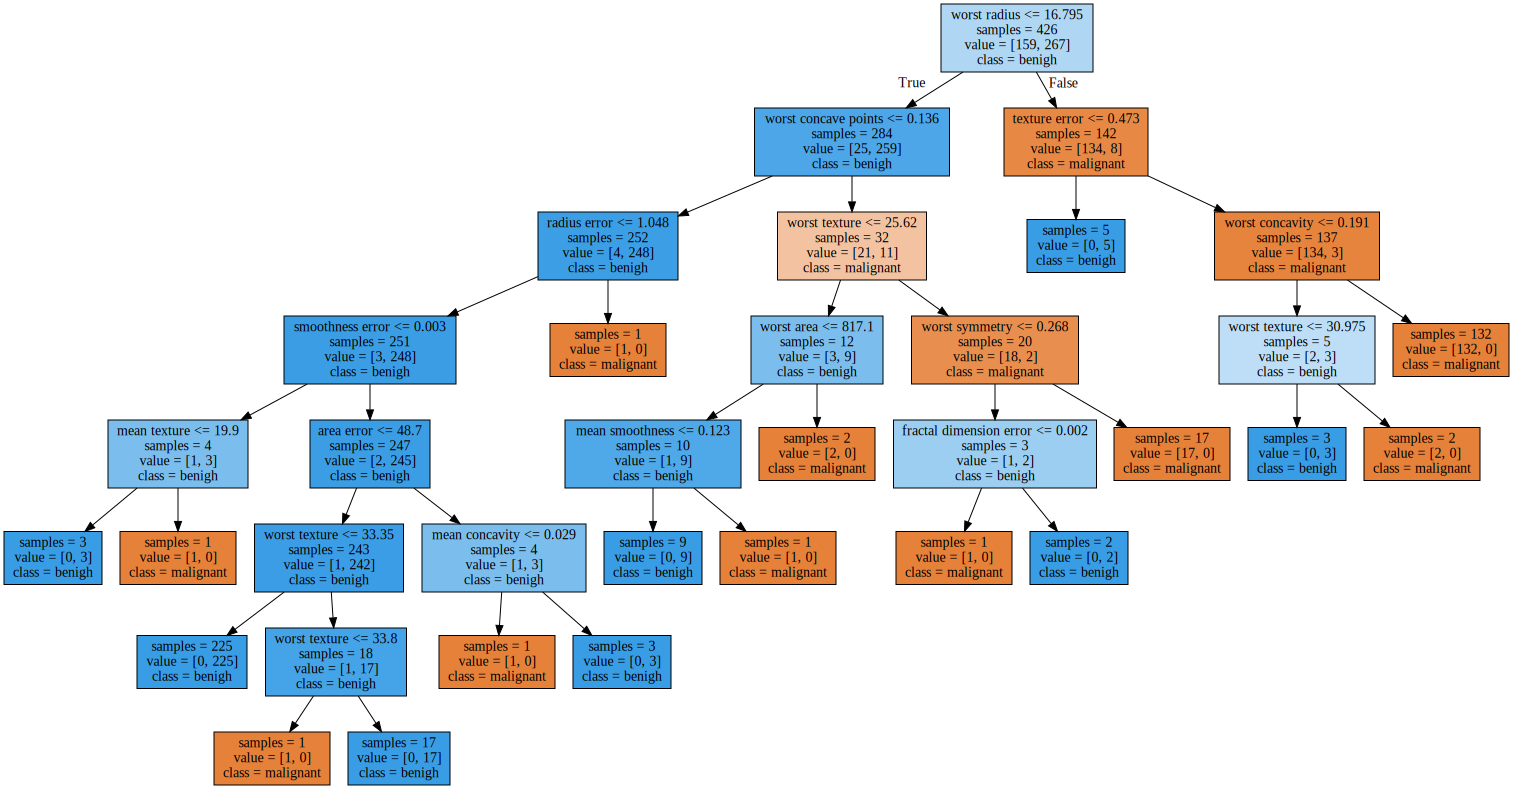

In [39]:
display(graphviz.Source(dot_graph))

In [40]:
# random forests

from sklearn.ensemble import RandomForestClassifier

In [41]:
from sklearn.datasets import make_moons

In [42]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify = y, random_state = 42
)

In [44]:
forest = RandomForestClassifier(n_estimators=5, random_state=2)

In [45]:
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

In [46]:
import matplotlib.pyplot as plt


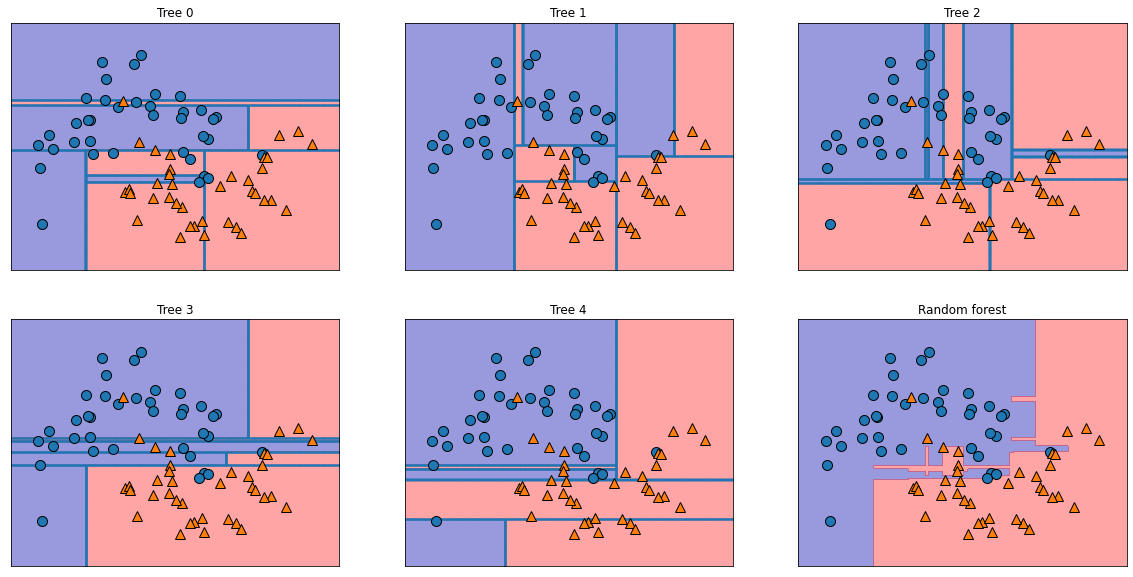

In [53]:
fig, axes = plt.subplots(2, 3, figsize = (20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
  ax.set_title("Tree {}".format(i))
  mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax = ax)

mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax = axes[-1,-1], alpha = 0.4)
axes[-1,-1].set_title("Random forest")

mglearn.discrete_scatter(X_train[:,0], X_train[:,1],y_train)
